In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [15]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')


In [16]:
dataset.shape

(50, 5)

In [17]:
dataset.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [18]:
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [21]:
columntransformer = columntransformer(["State", OneHotEncoder(), (1)), remainder, 'passthrough']
X = ct.fit_transform(X)

SyntaxError: invalid syntax (<ipython-input-21-d912e9975811>, line 1)

In [31]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


IndexError: index 3 is out of bounds for axis 1 with size 3

In [32]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [34]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [36]:
y_pred

array([ 89302.82834232, 116357.73119729, 116249.54644661, 100546.93876075,
       159644.21538528, 151242.46056682, 110482.65466339,  86925.94925078,
       134250.38936475, 149506.10186274])

In [39]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})


In [40]:
df

,Actual,Predicted
0,103282.38,89302.828342
1,144259.40,116357.731197
2,146121.95,116249.546447
3,77798.83,100546.938761
4,191050.39,159644.215385
5,105008.31,151242.460567
6,81229.06,110482.654663
7,97483.56,86925.949251
8,110352.25,134250.389365
9,166187.94,149506.101863


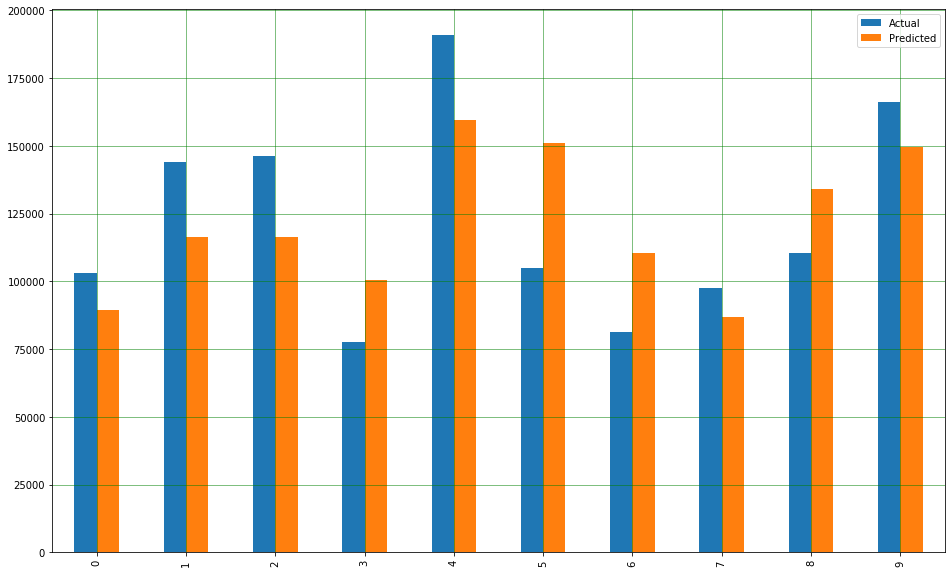

In [41]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()